<a href="https://colab.research.google.com/github/ssabrut/knee-arthritis-detection/blob/main/Annotated_Dataset_for_Knee_Arthritis_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import files

# # upload your kaggle.json API
# uploaded = files.upload()

In [2]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
# !kaggle datasets download -d hafiznouman786/annotated-dataset-for-knee-arthritis-detection

In [4]:
# !unzip annotated-dataset-for-knee-arthritis-detection.zip

In [5]:
from PIL import Image

# get sample image for dimension
width, height = Image.open('/content/Training/0Normal/NormalG0 (1).png').size

In [6]:
from tensorflow import keras

images = keras.utils.image_dataset_from_directory('Training', image_size=(height, width))
class_names = images.class_names

Found 1650 files belonging to 5 classes.


In [7]:
def plot_images(generator):
  plt.figure(figsize=(18, 7))
  for image, labels in generator.take(1):
    for i in range(18):
      ax = plt.subplot(3, 6, i + 1)
      plt.imshow(image[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

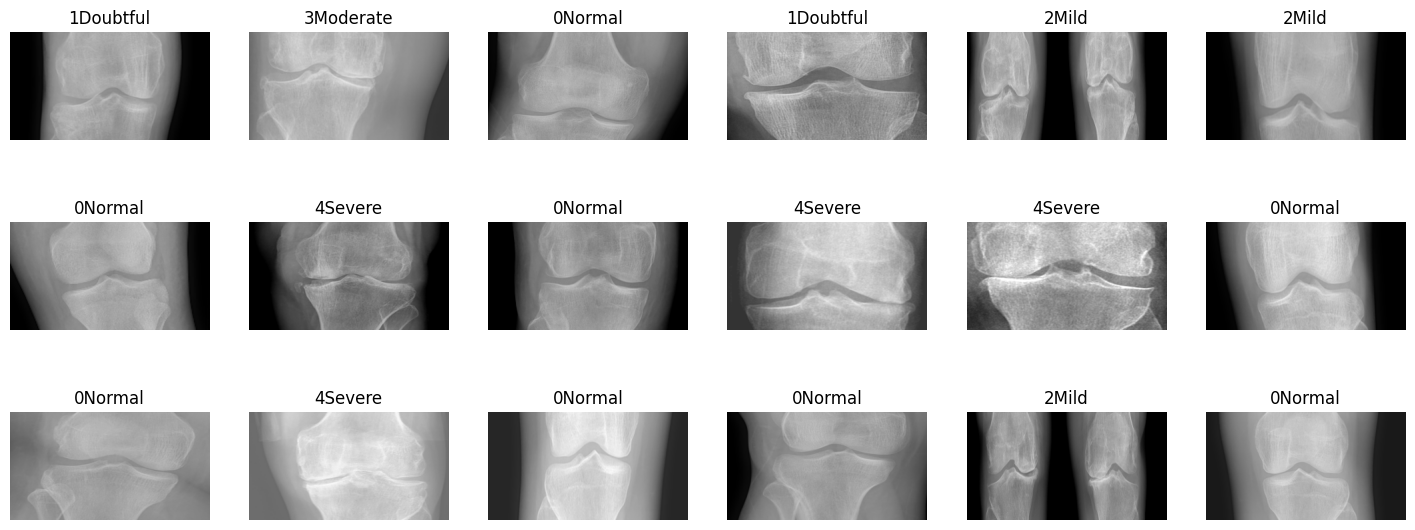

In [8]:
from matplotlib import pyplot as plt

# display random image from each class
plot_images(images)

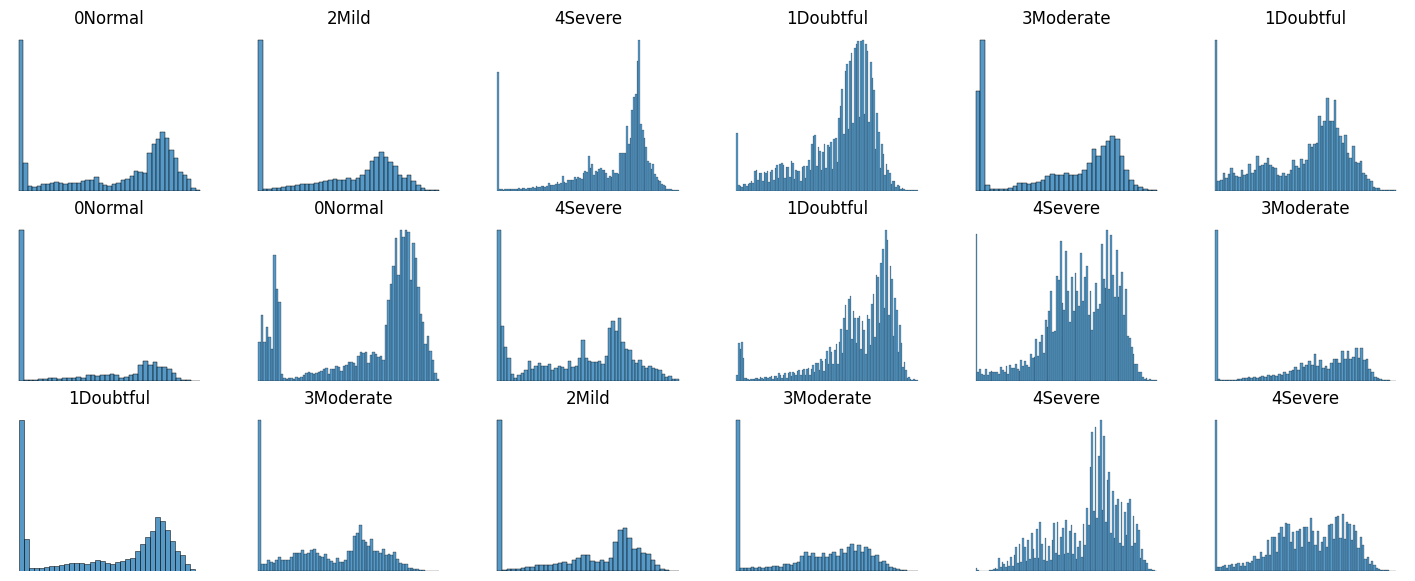

In [9]:
import seaborn as sns

# plot the histogram from each image to see the pixel distribution
plt.figure(figsize=(18, 7))
for image, labels in images.take(1):
  for i in range(18):
    ax = plt.subplot(3, 6, i + 1)
    flat_image = image[i].numpy().flatten().astype("uint8")
    sns.histplot(flat_image, ax=ax)
    ax.set_title(class_names[labels[i]])
    ax.axis("off")
plt.show()

# Histogram Equalization

In [10]:
!pip install --upgrade keras-cv

In [11]:
import keras_cv

he = keras_cv.layers.Equalization((0,255))
he_images = images.map(lambda x, y: (he(x), y))

Using TensorFlow backend


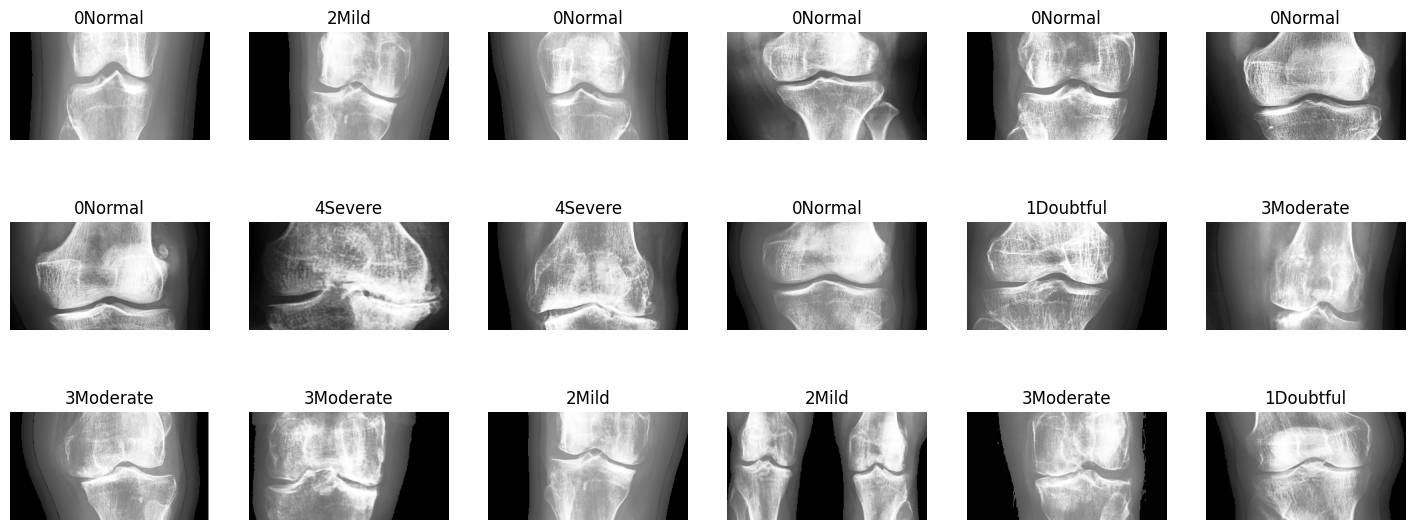

In [12]:
plot_images(he_images)

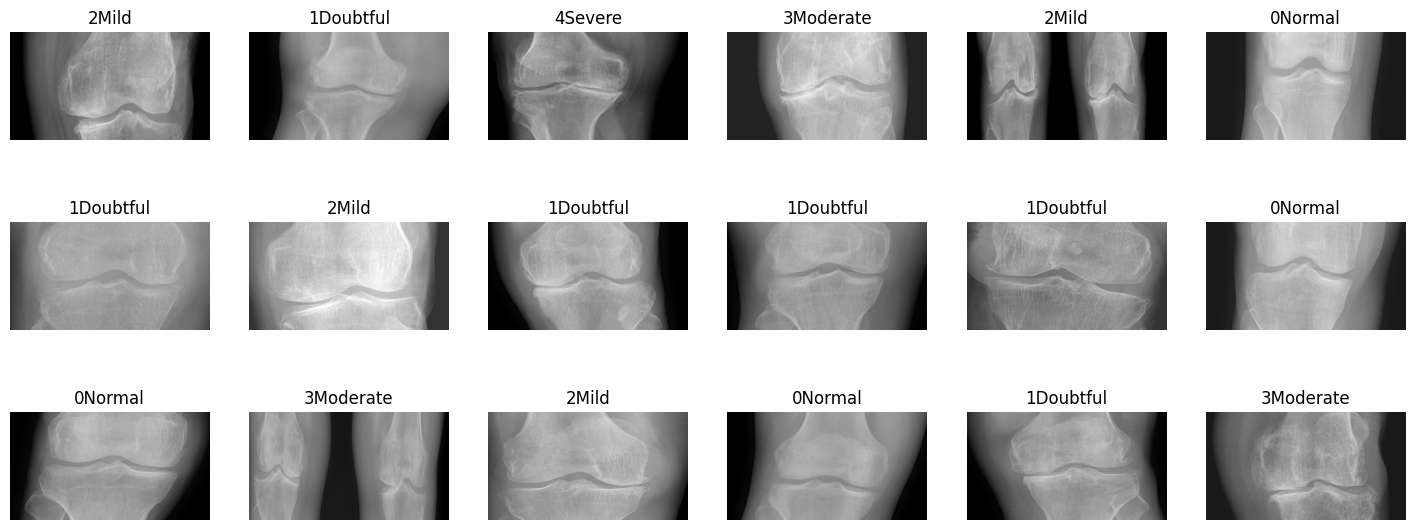

In [13]:
plot_images(images)

# Gamma Correction

In [32]:
from tensorflow import image

gamma_correction_images = images.map(lambda x, y: (image.adjust_gamma(x, .9), y))

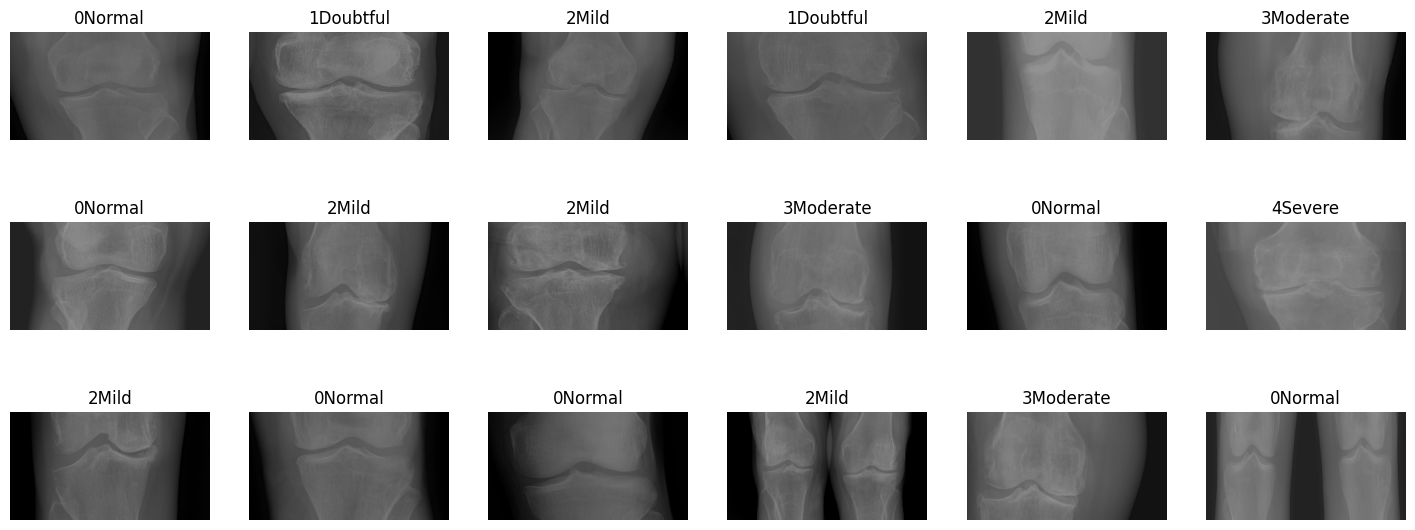

In [33]:
plot_images(gamma_correction_images)

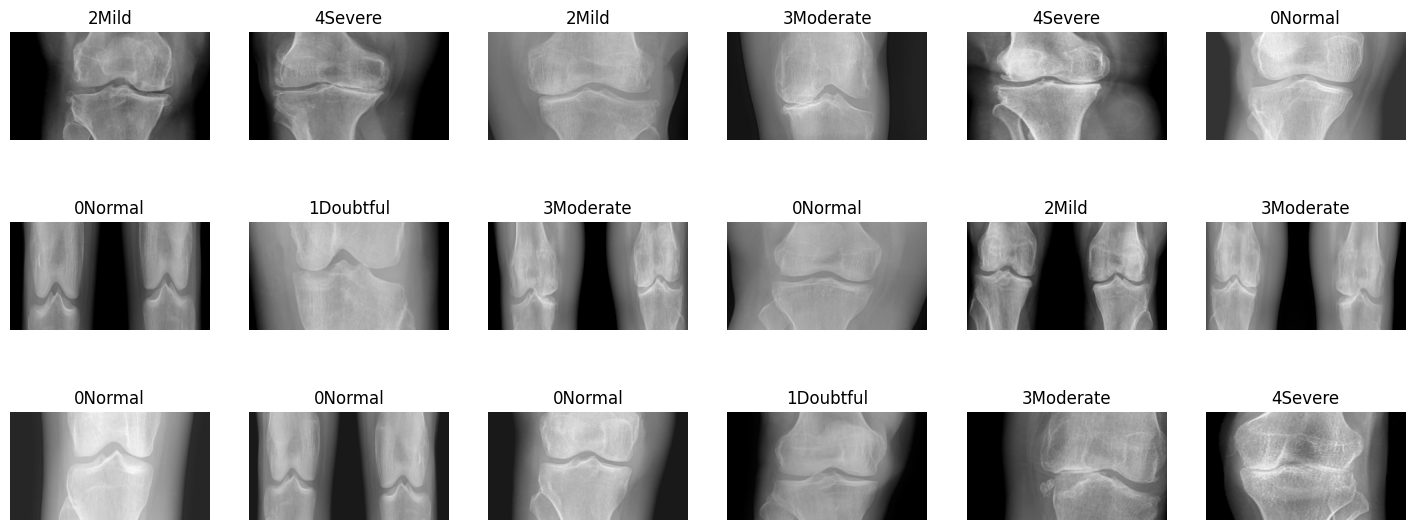

In [34]:
plot_images(images)